### Import required libraries

In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

## 1. Import and clean data

### Import data from csv file

In [269]:
bart = pd.read_csv("BartRider.csv")

### Overall structure of input data

In [270]:
bart.describe()

,Age,DistToWork,Education,Income,NbrInHouseHold,NbrInHouseholdUnder18,YrsInArea
count,5493.000000,5493.000000,5493.000000,5493.000000,5493.000000,5493.000000,5493.000000
mean,3.483707,11.482796,3.872383,5.160568,2.905334,0.707264,4.292190
std,1.699245,2.554918,1.272399,2.841157,1.524071,1.090521,1.168134
min,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,2.000000,10.000000,3.000000,2.000000,2.000000,0.000000,4.000000
50%,3.000000,11.000000,4.000000,6.000000,3.000000,0.000000,5.000000
75%,5.000000,13.000000,5.000000,8.000000,4.000000,1.000000,5.000000
max,7.000000,20.000000,6.000000,9.000000,9.000000,9.000000,5.000000


### Number of rows and columns of input data

In [271]:
bartRider = bart.iloc[:,:].values #building 2D array
print(bartRider.shape)

(5493, 12)


### Show the first 10 and last 10 instances

In [272]:
bartRider[0:10]

array([[7, 14, 'N', 3, 'F', 3, 'English', 1, 0, 'Rent', 5, 'Yes'],
       [7, 10, 'N', 5, 'M', 8, 'English', 2, 0, 'Own', 5, 'No'],
       [3, 9, 'N', 3, 'M', 1, 'English', 1, 0, 'Rent', 5, 'Yes'],
       [1, 13, 'N', 2, 'M', 1, 'English', 5, 3, 'Parent', 5, 'Yes'],
       [3, 14, 'N', 5, 'F', 2, 'English', 3, 1, 'Parent', 5, 'Yes'],
       [1, 12, 'N', 2, 'M', 1, 'English', 5, 0, 'Parent', 5, 'Yes'],
       [2, 10, 'N', 4, 'M', 3, 'English', 4, 2, 'Rent', 2, 'Yes'],
       [3, 13, 'N', 5, 'M', 6, 'English', 1, 0, 'Own', 5, 'No'],
       [7, 9, 'Y', 3, 'M', 4, 'English', 2, 0, 'Own', 4, 'No'],
       [2, 10, 'N', 4, 'F', 8, 'English', 2, 0, 'Parent', 5, 'Yes']],
      dtype=object)

In [273]:
bartRider[-10:]

array([[3, 17, 'Y', 4, 'F', 9, 'English', 3, 1, 'Own', 5, 'No'],
       [5, 12, 'N', 4, 'F', 8, 'English', 4, 2, 'Own', 2, 'No'],
       [2, 10, 'N', 4, 'M', 6, 'English', 2, 1, 'Own', 2, 'No'],
       [5, 13, 'N', 6, 'M', 8, 'English', 1, 0, 'Own', 4, 'No'],
       [3, 15, 'Y', 5, 'F', 8, 'English', 2, 0, 'Own', 5, 'Yes'],
       [3, 11, 'Y', 4, 'M', 5, 'English', 2, 0, 'Own', 5, 'Yes'],
       [4, 9, 'Y', 3, 'F', 6, 'English', 3, 1, 'Rent', 2, 'Yes'],
       [2, 7, 'N', 4, 'M', 2, 'English', 1, 1, 'Rent', 1, 'Yes'],
       [3, 7, 'Y', 3, 'F', 9, 'English', 2, 0, 'Own', 5, 'No'],
       [2, 10, 'N', 4, 'F', 1, 'English', 4, 2, 'Parent', 2, 'Yes']],
      dtype=object)

## 2. Code for exploring single variables

### List columns of the data

In [274]:
bart.columns

Index(['Age', 'DistToWork', 'DualInc', 'Education', 'Gender', 'Income',
       'Language', 'NbrInHouseHold', 'NbrInHouseholdUnder18', 'OwnRent',
       'YrsInArea', 'Rider'],
      dtype='object')

### Boxplot for Age and Education

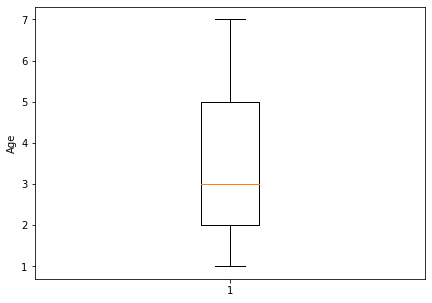

In [275]:
fig = plt.figure(figsize=(7,5))
plt.boxplot(bartRider[:,0])
plt.ylabel("Age")
plt.show()

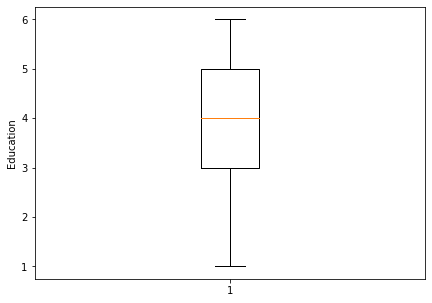

In [276]:
fig = plt.figure(figsize=(7,5))
plt.boxplot(bartRider[:,3])
plt.ylabel("Education")
plt.show()

### Histogram for Income and YesInArea

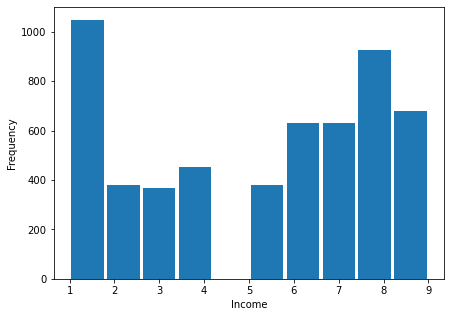

In [277]:
fig = plt.figure(figsize=(7,5))
income = bartRider[:,5]
plt.hist(income, rwidth=0.9)
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

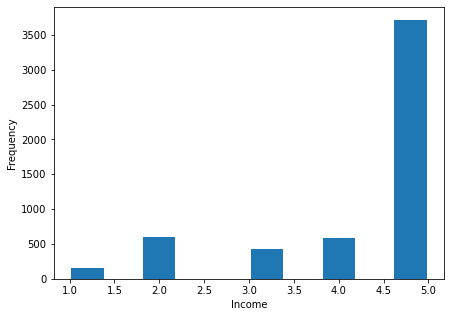

In [278]:
fig = plt.figure(figsize=(7,5))
years = bartRider[:,10]
plt.hist(years, rwidth=0.9)
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

### For variables DistToWork and NbrInHouseHold, show quantiles

In [279]:
dist = bartRider[:,1]
print("0% \t", "25% \t","50% \t","75% \t","100% \t")
print(np.quantile(dist, .0),'\t',
      np.quantile(dist, .25),'\t',
      np.quantile(dist, .5),'\t',
      np.quantile(dist, .75),'\t',
      np.quantile(dist, 1.0))

0% 	 25% 	 50% 	 75% 	 100% 	
3.0 	 10.0 	 11.0 	 13.0 	 20.0


In [280]:
household = bartRider[:,7]
print("0% \t", "25% \t","50% \t","75% \t","100% \t")
print(np.quantile(household, .0),'\t',
      np.quantile(household, .25),'\t',
      np.quantile(household, .5),'\t',
      np.quantile(household, .75),'\t',
      np.quantile(household, 1.0))

0% 	 25% 	 50% 	 75% 	 100% 	
1.0 	 2.0 	 3.0 	 4.0 	 9.0


### Choose two factor variables, show number of instances in each category/level

In [281]:
gender = bartRider[:,4]
unique, counts = np.unique(gender, return_counts=True)
np.asarray((unique, counts))

array([['F', 'M'],
       [2958, 2535]], dtype=object)

In [282]:
rider = bartRider[:,11]
unique, counts = np.unique(rider, return_counts=True)
np.asarray((unique, counts))

array([['No', 'Yes'],
       [3139, 2354]], dtype=object)

###  Choose two factor variables to plot

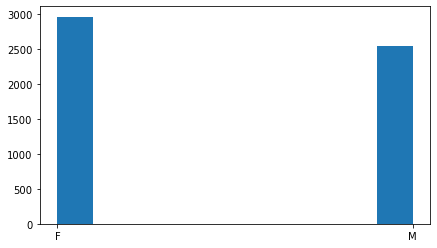

In [283]:
fig = plt.figure(figsize=(7,4))
plt.hist(gender)
plt.show()

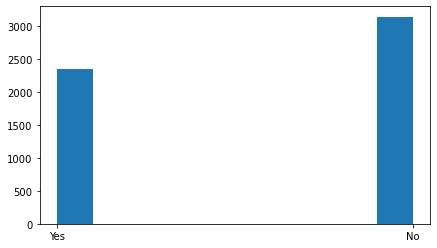

In [284]:
fig = plt.figure(figsize=(7,4))
plt.hist(rider)
plt.show()

## 3. Code to understand relationships among multiple variables

In [285]:
bart.columns

Index(['Age', 'DistToWork', 'DualInc', 'Education', 'Gender', 'Income',
       'Language', 'NbrInHouseHold', 'NbrInHouseholdUnder18', 'OwnRent',
       'YrsInArea', 'Rider'],
      dtype='object')

### Display correlations  for DistToWork and NbrInHouseHold

In [286]:
pd.DataFrame(bart, columns=['DistToWork','NbrInHouseHold']).corr()

,DistToWork,NbrInHouseHold
DistToWork,1.000000,0.009121
NbrInHouseHold,0.009121,1.000000


### Display correlations for all numeric variables

In [287]:
pd.DataFrame(bart, columns=['Age','DistToWork','Education','Income','NbrInHouseHold','NbrInHouseholdUnder18','YrsInArea']).corr()

,Age,DistToWork,Education,Income,NbrInHouseHold,NbrInHouseholdUnder18,YrsInArea
Age,1.000000,0.002148,0.407692,0.417787,-0.342225,-0.319858,0.173433
DistToWork,0.002148,1.000000,0.009714,0.036000,0.009121,0.011459,0.015747
Education,0.407692,0.009714,1.000000,0.505920,-0.289605,-0.297774,-0.068012
Income,0.417787,0.036000,0.505920,1.000000,-0.109310,-0.142618,0.088785
NbrInHouseHold,-0.342225,0.009121,-0.289605,-0.109310,1.000000,0.710546,0.072916
NbrInHouseholdUnder18,-0.319858,0.011459,-0.297774,-0.142618,0.710546,1.000000,0.065442
YrsInArea,0.173433,0.015747,-0.068012,0.088785,0.072916,0.065442,1.000000


### Show a boxplot of Income by Rider

<AxesSubplot:xlabel='Rider', ylabel='Income'>

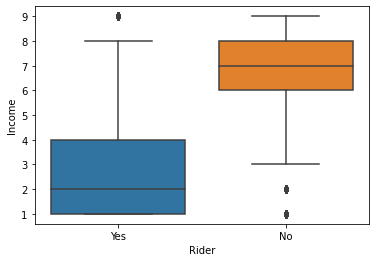

In [288]:
sns.boxplot(x="Rider", y="Income", data=bart)

###  Boxplot of Income by Rider for only Female

<AxesSubplot:xlabel='Rider', ylabel='Income'>

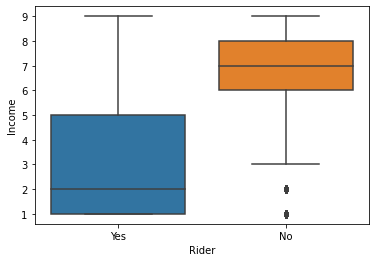

In [289]:
sns.boxplot(x="Rider", y="Income", data=bart[bart['Gender'] == 'F'])

## 4. Decision tree model prediction

### Create dummy variablels

In [290]:
bart.columns

Index(['Age', 'DistToWork', 'DualInc', 'Education', 'Gender', 'Income',
       'Language', 'NbrInHouseHold', 'NbrInHouseholdUnder18', 'OwnRent',
       'YrsInArea', 'Rider'],
      dtype='object')

In [291]:
bart = pd.get_dummies(bart, columns=['DualInc','Gender','Language','OwnRent'])

### Convert the above to numpy array

In [292]:
bart.columns

Index(['Age', 'DistToWork', 'Education', 'Income', 'NbrInHouseHold',
       'NbrInHouseholdUnder18', 'YrsInArea', 'Rider', 'DualInc_N', 'DualInc_Y',
       'Gender_F', 'Gender_M', 'Language_English', 'Language_Other',
       'Language_Spanish', 'OwnRent_Own', 'OwnRent_Parent', 'OwnRent_Rent'],
      dtype='object')

In [293]:
bartRider = bart.iloc[:,:].values
print(bartRider.shape)

(5493, 18)


### Partition the data - 50% for training and 50% for testing

In [294]:
predictors = np.delete(bartRider, 7, axis=1)
target = bartRider[:,7]
print(predictors.shape, target)

predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.5, stratify=target, random_state=1)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(5493, 17) ['Yes' 'No' 'Yes' ... 'Yes' 'No' 'Yes']
(2746, 17) (2747, 17) (2746,) (2747,)


### Build a decision tree model

In [295]:
model = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 3)
model.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

In [296]:
del bart['Rider']
list(bart.columns)[:]

['Age',
 'DistToWork',
 'Education',
 'Income',
 'NbrInHouseHold',
 'NbrInHouseholdUnder18',
 'YrsInArea',
 'DualInc_N',
 'DualInc_Y',
 'Gender_F',
 'Gender_M',
 'Language_English',
 'Language_Other',
 'Language_Spanish',
 'OwnRent_Own',
 'OwnRent_Parent',
 'OwnRent_Rent']

### Plot the decision tree model

[Text(1255.5, 1426.95, 'Income <= 4.5\nentropy = 0.985\nsamples = 2746\nvalue = [1569, 1177]\nclass = No'),
 Text(627.75, 1019.25, 'Income <= 2.5\nentropy = 0.664\nsamples = 1106\nvalue = [191, 915]\nclass = Yes'),
 Text(313.875, 611.55, 'Age <= 1.5\nentropy = 0.381\nsamples = 702\nvalue = [52, 650]\nclass = Yes'),
 Text(156.9375, 203.8499999999999, 'entropy = 0.086\nsamples = 277\nvalue = [3, 274]\nclass = Yes'),
 Text(470.8125, 203.8499999999999, 'entropy = 0.516\nsamples = 425\nvalue = [49, 376]\nclass = Yes'),
 Text(941.625, 611.55, 'OwnRent_Rent <= 0.5\nentropy = 0.929\nsamples = 404\nvalue = [139, 265]\nclass = Yes'),
 Text(784.6875, 203.8499999999999, 'entropy = 0.703\nsamples = 173\nvalue = [33, 140]\nclass = Yes'),
 Text(1098.5625, 203.8499999999999, 'entropy = 0.995\nsamples = 231\nvalue = [106, 125]\nclass = Yes'),
 Text(1883.25, 1019.25, 'OwnRent_Parent <= 0.5\nentropy = 0.634\nsamples = 1640\nvalue = [1378, 262]\nclass = No'),
 Text(1569.375, 611.55, 'Income <= 6.5\nentrop

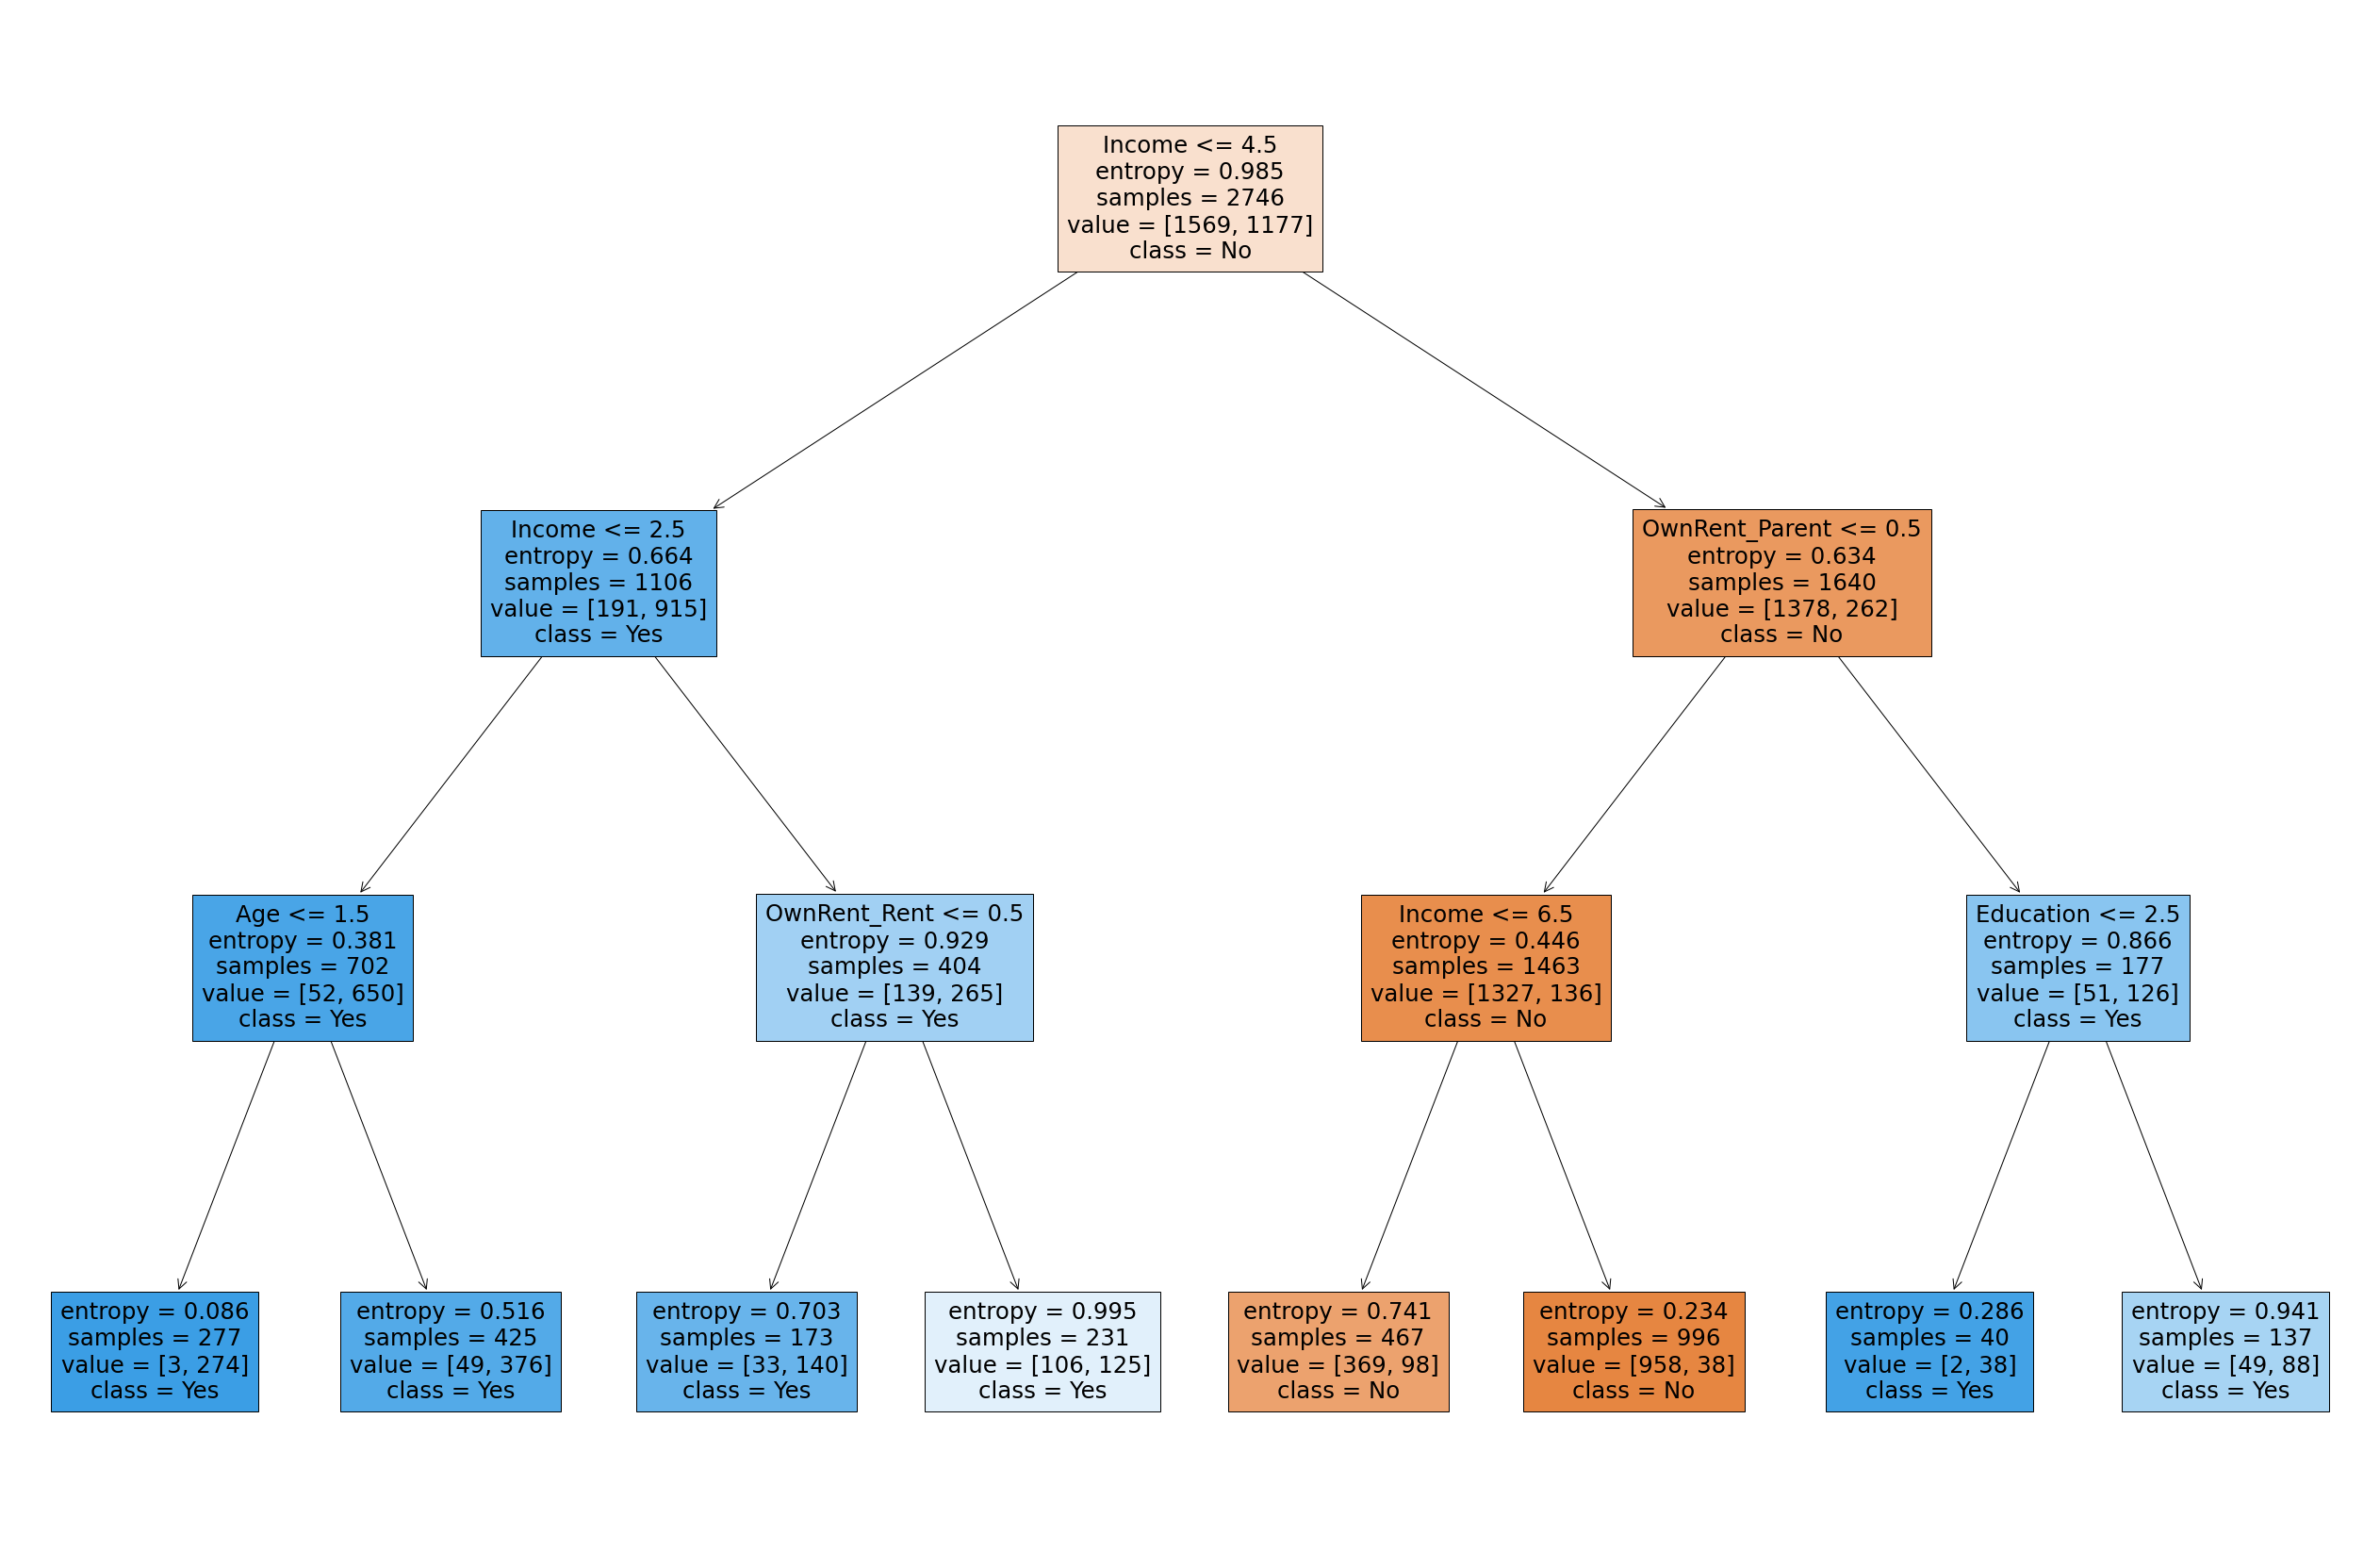

In [297]:
fig = plt.figure(figsize=(45,30))
tree.plot_tree(model, 
               feature_names=list(bart.columns)[:],  
               class_names=['No','Yes'],
               filled=True)

In [298]:
print(tree.export_text(model, feature_names=list(bart.columns)[:]))

|--- Income <= 4.50
|   |--- Income <= 2.50
|   |   |--- Age <= 1.50
|   |   |   |--- class: Yes
|   |   |--- Age >  1.50
|   |   |   |--- class: Yes
|   |--- Income >  2.50
|   |   |--- OwnRent_Rent <= 0.50
|   |   |   |--- class: Yes
|   |   |--- OwnRent_Rent >  0.50
|   |   |   |--- class: Yes
|--- Income >  4.50
|   |--- OwnRent_Parent <= 0.50
|   |   |--- Income <= 6.50
|   |   |   |--- class: No
|   |   |--- Income >  6.50
|   |   |   |--- class: No
|   |--- OwnRent_Parent >  0.50
|   |   |--- Education <= 2.50
|   |   |   |--- class: Yes
|   |   |--- Education >  2.50
|   |   |   |--- class: Yes



### Make predictions on both training and testing sets

In [299]:
prediction_on_test = model.predict(predictors_test)
prediction_on_train = model.predict(predictors_train)

In [300]:
print(prediction_on_test.shape,prediction_on_test)
print(prediction_on_train.shape,prediction_on_train)

(2747,) ['Yes' 'No' 'No' ... 'No' 'No' 'No']
(2746,) ['Yes' 'Yes' 'No' ... 'Yes' 'Yes' 'No']


### Generate confusion matrix and evaluation metrics on training and testing sets

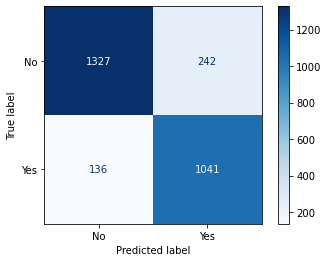

In [301]:
plot_confusion_matrix(model, predictors_train, target_train, cmap=plt.cm.Blues, values_format='d')

In [302]:
print(classification_report(target_train, prediction_on_train))

              precision    recall  f1-score   support

          No       0.91      0.85      0.88      1569
         Yes       0.81      0.88      0.85      1177

    accuracy                           0.86      2746
   macro avg       0.86      0.87      0.86      2746
weighted avg       0.87      0.86      0.86      2746



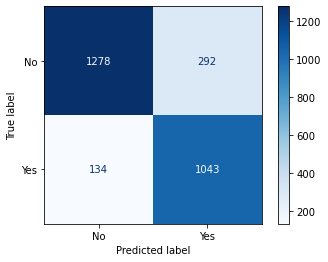

In [303]:
plot_confusion_matrix(model, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')

In [304]:
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.91      0.81      0.86      1570
         Yes       0.78      0.89      0.83      1177

    accuracy                           0.84      2747
   macro avg       0.84      0.85      0.84      2747
weighted avg       0.85      0.84      0.85      2747

